C:\Users\b3lab\miniconda3\envs\Flower\lib\site-packages\flwr_datasets\metrics\utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(
C:\Users\b3lab\miniconda3\envs\Flower\lib\site-packages\flwr_datasets\metrics\utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(
C:\Users\b3lab\miniconda3\envs\Flower\lib\site-packages\flwr_datasets\visualization\comparison_label_distribution.py:222: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


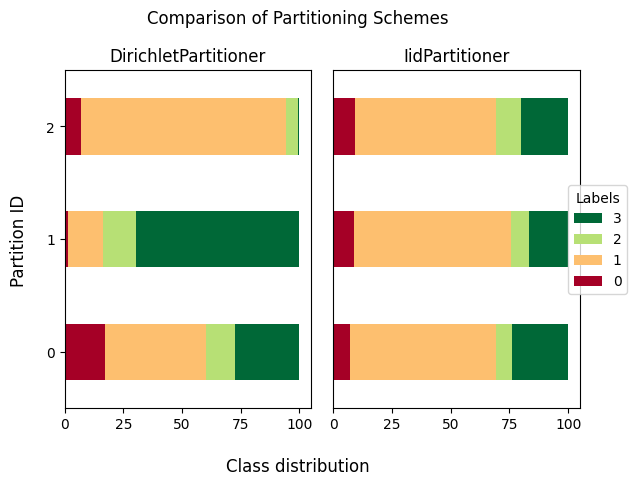

In [21]:
import pandas as pd
from datasets import load_dataset
from flwr_datasets.partitioner import (
    IidPartitioner,
    DirichletPartitioner,
)
from flwr_datasets.visualization import plot_comparison_label_distribution

TRAIN_COLS = ['lc', 'pi', 'ma', 'nbd', 'ml', 'd', 'mi', 'fo', 'r', 'e', 'label']
partitioner_list = []
title_list = ["DirichletPartitioner", "IidPartitioner"]
dataset = "train_scaled.csv"
fds = load_dataset("csv",
                   data_files=fr"{dataset}")[
    "train"]

partitioner_dirich = DirichletPartitioner(
    num_partitions=3,
    partition_by="label",
    alpha=1,
    min_partition_size=0,
)
partitioner_dirich.dataset = fds
partitioner_list.append(partitioner_dirich)

partitioner = IidPartitioner(num_partitions=3)
partitioner.dataset = fds
partitioner_list.append(partitioner)

# dataset = partitioner.load_partition(1).with_format("pandas")[:]
fig, axes, df_list = plot_comparison_label_distribution(
    partitioner_list=partitioner_list,
    label_name="label",
    subtitle="Comparison of Partitioning Schemes",
    titles=title_list,
    legend=True,
    verbose_labels=True,
)

C:\Users\b3lab\miniconda3\envs\Flower\lib\site-packages\flwr_datasets\metrics\utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(


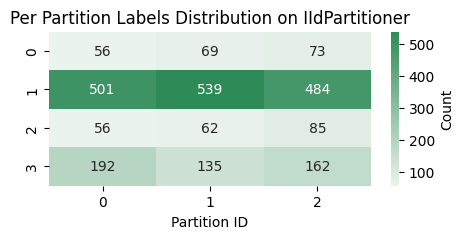

In [2]:
from flwr_datasets.visualization import plot_label_distributions

fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="label",
    plot_type="heatmap",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution on IIdPartitioner",
    plot_kwargs={"annot": True},
)

C:\Users\b3lab\miniconda3\envs\Flower\lib\site-packages\flwr_datasets\metrics\utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(


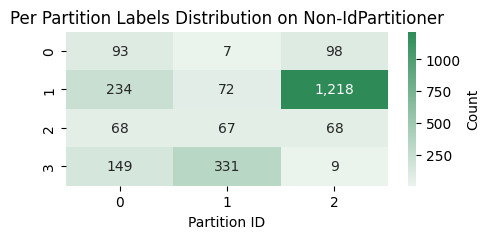

In [3]:
fig, ax, df = plot_label_distributions(
    partitioner_dirich,
    label_name="label",
    plot_type="heatmap",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution on Non-IdPartitioner",
    plot_kwargs={"annot": True},
)

In [24]:
for i in range(3):
    partitioner.load_partition(i).with_format("pandas")[:].to_json(fr"llm\client_{str(i)}.jsonl",index=False, orient="records", lines=True)

In [6]:
for i in range(3):
    partitioner_dirich.load_partition(i).with_format("pandas")[:].to_csv(
        fr"noniid\client_{str(i)}.csv",
        index=False)